## Market Comparison of Option Pricing Models

In this notebook, we will compare theoretical option prices generated by the Black-Scholes model to real market option prices using real data from Yahoo Finance. This allows us to explore pricing discrepancies, evaluate the validity of risk-neutral assumptions, and visualize implied volatility patterns.

In [ ]:
import sys
sys.path.append("../models")

import matplotlib.pyplot as plt
import yfinance as yf
from black_scholes import black_scholes_price

ticker = 'AAPL'
stock = yf.Ticker(ticker)

# select options expiry date
expiry = stock.options[0]
opt_chain = stock.option_chain(expiry)
calls = opt_chain.calls
puts = opt_chain.puts

# show call option contracts
print(calls.head())

        contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0  AAPL250718C00090000 2025-07-11 15:38:33+00:00    90.0     120.77  120.70   
1  AAPL250718C00095000 2025-07-11 15:38:33+00:00    95.0     115.75  115.75   
2  AAPL250718C00100000 2025-07-10 19:44:53+00:00   100.0     113.00  110.85   
3  AAPL250718C00105000 2025-07-11 18:09:40+00:00   105.0     106.55  105.65   
4  AAPL250718C00110000 2025-07-11 18:09:40+00:00   110.0     101.54  100.65   

      ask    change  percentChange  volume  openInterest  impliedVolatility  \
0  121.60 -2.230003      -1.813011     2.0           405           3.269533   
1  116.65 -2.269997      -1.923400     2.0            13           2.281254   
2  111.45  0.000000       0.000000     4.0           531           2.722659   
3  106.65 -1.360001      -1.260310     3.0            43           2.775394   
4  101.55 -1.370003      -1.331263    38.0           346           2.515629   

   inTheMoney contractSize currency  
0        Tru

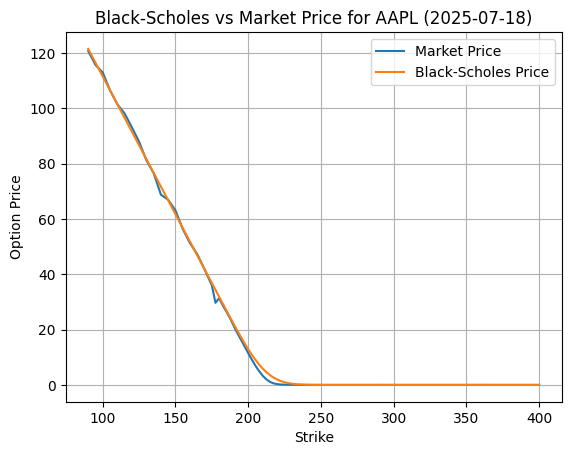

In [ ]:
S = stock.history(period="1d")["Close"].iloc[-1]
r = 0.05
T = 30 / 365
sigma = 0.2

# calculate black scholes price for different strike prices
calls['bs_price'] = calls['strike'].apply(lambda K: black_scholes_price(S, K, T, r, sigma))

# plot actual price vs black scholes
plt.plot(calls['strike'], calls['lastPrice'], label='Market Price')
plt.plot(calls['strike'], calls['bs_price'], label='Black Scholes Price')
plt.xlabel("Strike")
plt.ylabel("Option Price")
plt.title(f"Black-Scholes vs Market Price for {ticker} ({expiry})")
plt.legend()
plt.grid()
plt.show()